##  Modelo de propensão de churn para telecom.

In [1]:
# Carregando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('telco_churn_data.csv')
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [3]:
df.shape

(7043, 46)

In [4]:
df_2 = df.drop(['Zip Code','Latitude', 'Longitude'], axis=1)
df_2.shape

(7043, 43)

In [5]:
def verificar_colunas_com_unico_valor(dataframe):
    colunas_unico_valor = []
    for coluna in dataframe.columns:
        if dataframe[coluna].nunique() == 1:
            colunas_unico_valor.append(coluna)
    return colunas_unico_valor

# Aplicar a função e imprimir o resultado
colunas_com_unico_valor = verificar_colunas_com_unico_valor(df_2)
print("Colunas com um único valor:", colunas_com_unico_valor)

Colunas com um único valor: []


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [7]:
percentual_nulos = df_2.isnull().mean() * 100
percentual_nulos

Customer ID                           0.000000
Referred a Friend                     0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly Long Distance Charges     0.000000
Multiple Lines                        0.000000
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download               0.000000
Online Security                       0.000000
Online Backup                         0.000000
Device Protection Plan                0.000000
Premium Tech Support                  0.000000
Streaming TV                          0.000000
Streaming Movies                      0.000000
Streaming Music                       0.000000
Unlimited Data                        0.000000
Contract                              0.000000
Paperless Billing                     0.000000
Payment Metho

In [8]:
valores_unicos = df_2['Offer'].unique()
valores_unicos

array([nan, 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [9]:
df_2['Offer'] = df_2['Offer'].fillna('no Offer')

In [10]:
percentual_nulos = df_2.isnull().mean() * 100
percentual_nulos

Customer ID                           0.000000
Referred a Friend                     0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                 0.000000
Phone Service                         0.000000
Avg Monthly Long Distance Charges     0.000000
Multiple Lines                        0.000000
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download               0.000000
Online Security                       0.000000
Online Backup                         0.000000
Device Protection Plan                0.000000
Premium Tech Support                  0.000000
Streaming TV                          0.000000
Streaming Movies                      0.000000
Streaming Music                       0.000000
Unlimited Data                        0.000000
Contract                              0.000000
Paperless Billing                     0.000000
Payment Metho

In [11]:
valores_unicos = df_2['Internet Type'].unique()
valores_unicos

array(['Fiber Optic', 'Cable', 'DSL', nan], dtype=object)

### Preenchendo o nan de internet type com no internet

In [12]:
df_2['Internet Type'] = df_2['Internet Type'].fillna('no Internet')

In [13]:
valores_unicos = df_2['Churn Category'].unique()
valores_unicos

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [14]:
df_2['Churn Category'] = df_2['Churn Category'].fillna('no Churn')

In [15]:
valores_unicos = df_2['Churn Reason'].unique()
valores_unicos

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

In [16]:
df_2['Churn Reason'] = df_2['Churn Reason'].fillna('no Churn')

In [17]:
df_3 = df_2.drop(['Customer Satisfaction'], axis=1)
df_3.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported
0,8779-QRDMV,No,0,1,no Offer,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,68701,1,5433,Competitor,Competitor offered more data,5,0
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,55668,1,5302,Competitor,Competitor made better offer,5,0
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,47534,1,3179,Competitor,Competitor made better offer,1,0
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,27778,1,5337,Dissatisfaction,Limited range of services,1,1
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,26265,1,2793,Price,Extra data charges,1,0


In [18]:
df_3.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,22139.603294,0.265370,4400.295755,1.338776,0.308107
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,21152.392837,0.441561,1183.057152,1.430471,0.717514
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,11.000000,0.000000,2003.000000,0.000000,0.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000


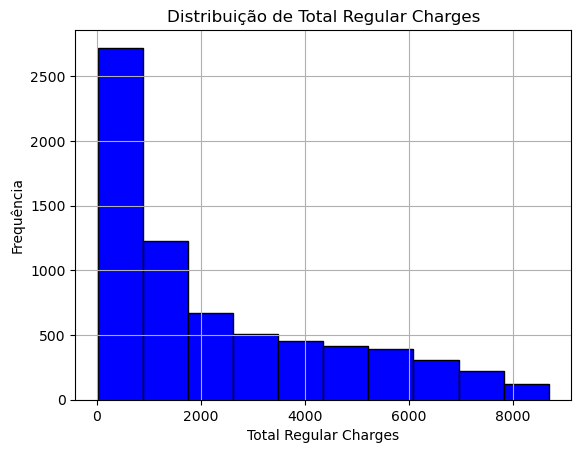

In [19]:
plt.hist(df['Total Regular Charges'], bins=10, color='blue', edgecolor='black')
plt.title('Distribuição de Total Regular Charges')
plt.xlabel('Total Regular Charges')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

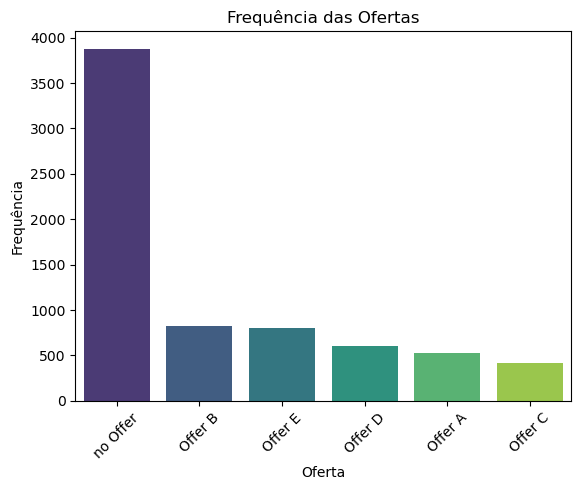

In [20]:
# Contando as ocorrências de cada oferta
offer_counts = df_3['Offer'].value_counts()

# Criando o gráfico de barras
sns.barplot(x=offer_counts.index, y=offer_counts.values, palette='viridis')
plt.title('Frequência das Ofertas')
plt.xlabel('Oferta')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor visualização
plt.show()

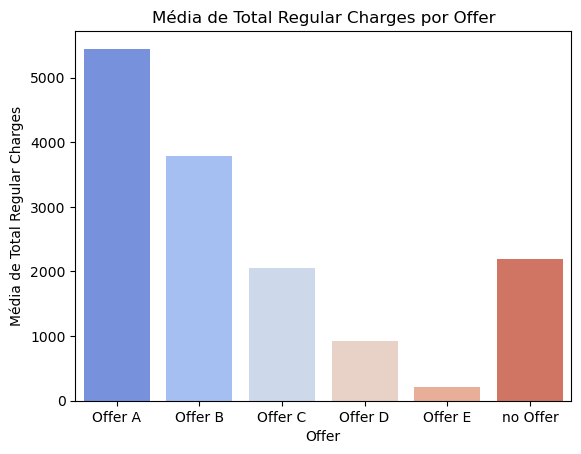

In [21]:
# Calculando a média de Total Regular Charges para cada Offer
average_charges = df_3.groupby('Offer')['Total Regular Charges'].mean().reset_index()

# Criando o gráfico de barras
sns.barplot(x='Offer', y='Total Regular Charges', data=average_charges, palette='coolwarm')
plt.title('Média de Total Regular Charges por Offer')
plt.xlabel('Offer')
plt.ylabel('Média de Total Regular Charges')
plt.show()

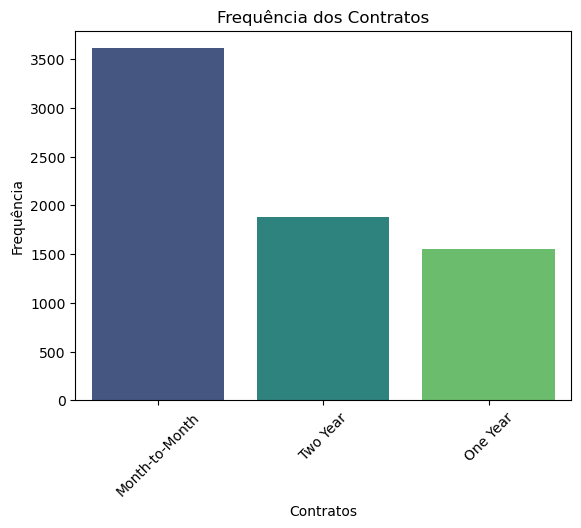

In [22]:
contract_counts = df_3['Contract'].value_counts()

# Criando o gráfico de barras
sns.barplot(x=contract_counts.index, y=contract_counts.values, palette='viridis')
plt.title('Frequência dos Contratos')
plt.xlabel('Contratos')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor visualização
plt.show()

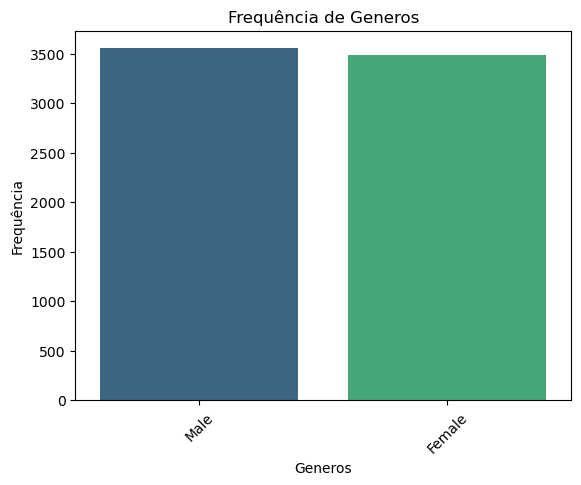

In [23]:
gender_counts = df_3['Gender'].value_counts()

# Criando o gráfico de barras
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Frequência de Generos')
plt.xlabel('Generos')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor visualização
plt.show()

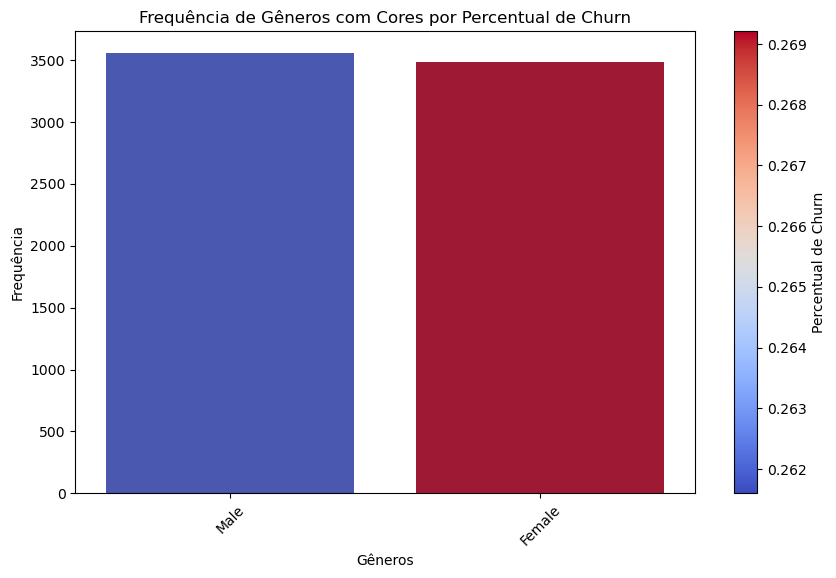

In [24]:
# Calculando a frequência de gêneros
gender_counts = df_3['Gender'].value_counts()

# Calculando a porcentagem de churn para cada gênero
churn_percentages = df_3.groupby('Gender')['Churn Value'].mean()

# Criando uma lista de cores baseada na porcentagem de churn
# Usaremos um mapa de cores que varia de azul (baixo churn) a vermelho (alto churn)
norm = plt.Normalize(churn_percentages.min(), churn_percentages.max())
colors = plt.cm.coolwarm(norm(churn_percentages[gender_counts.index]))

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)
plt.title('Frequência de Gêneros com Cores por Percentual de Churn')
plt.xlabel('Gêneros')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor visualização

# Adicionando a colorbar corretamente
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=barplot)
cbar.set_label('Percentual de Churn')

plt.show()

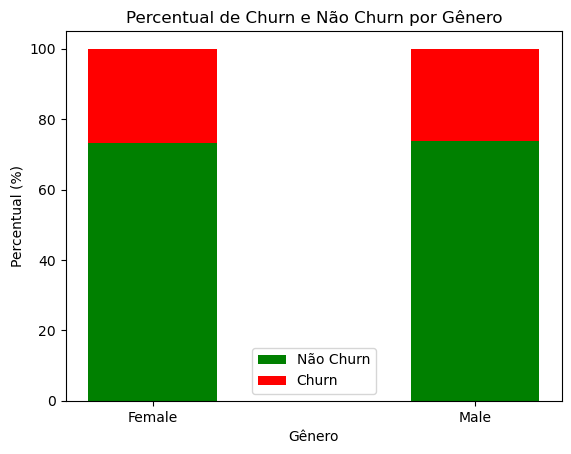

In [25]:
# Calculando a contagem de churn e não churn para cada gênero
churn_data = df_3.pivot_table(index='Gender', columns='Churn Value', aggfunc='size', fill_value=0)

# Calculando percentuais
total = churn_data.sum(axis=1)
percent_churn = churn_data[1] / total * 100
percent_no_churn = churn_data[0] / total * 100

# Preparando os dados para o gráfico
gender_labels = churn_data.index
x = range(len(gender_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

# Adicionando títulos e rótulos
ax.set_xlabel('Gênero')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Gênero')
ax.set_xticks(x)
ax.set_xticklabels(gender_labels)
ax.legend()

plt.show()

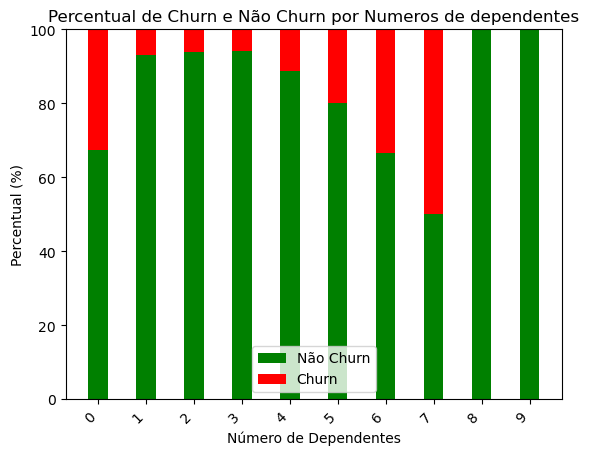

In [26]:
# Calculando a contagem de churn e não churn para numero de dependentes
churn_data = df_3.pivot_table(index='Number of Dependents', columns='Churn Value', aggfunc='size', fill_value=0)

# Calculando percentuais
total = churn_data.sum(axis=1)
percent_churn = churn_data[1] / total * 100
percent_no_churn = churn_data[0] / total * 100

# Preparando os dados para o gráfico
dependents_labels = churn_data.index
x = range(len(dependents_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

# Adicionando títulos e rótulos
ax.set_xlabel('Número de Dependentes')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Numeros de dependentes')
ax.set_xticks(x)
ax.set_xticklabels(dependents_labels, rotation=45, ha='right') 
ax.legend()

plt.show()

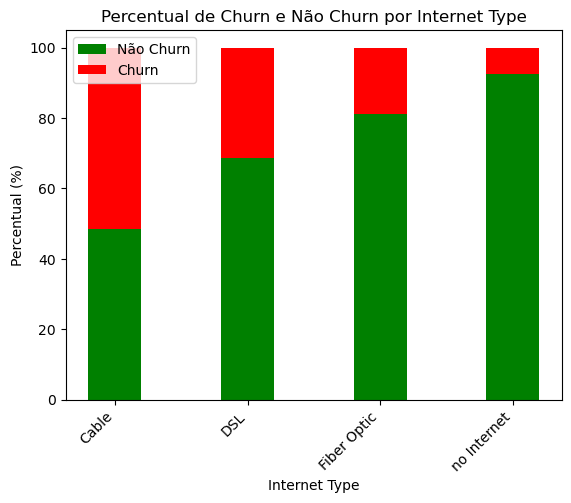

In [27]:
# Calculando a contagem de churn e não churn para Internet Type
churn_data = df_3.pivot_table(index='Internet Type', columns='Churn Value', aggfunc='size', fill_value=0)

# Calculando percentuais
total = churn_data.sum(axis=1)
percent_churn = churn_data[1] / total * 100
percent_no_churn = churn_data[0] / total * 100

# Preparando os dados para o gráfico
internet_type_labels = churn_data.index
x = range(len(internet_type_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

# Adicionando títulos e rótulos
ax.set_xlabel('Internet Type')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Internet Type')
ax.set_xticks(x)
ax.set_xticklabels(internet_type_labels, rotation=45, ha='right') 
ax.legend()

plt.show()

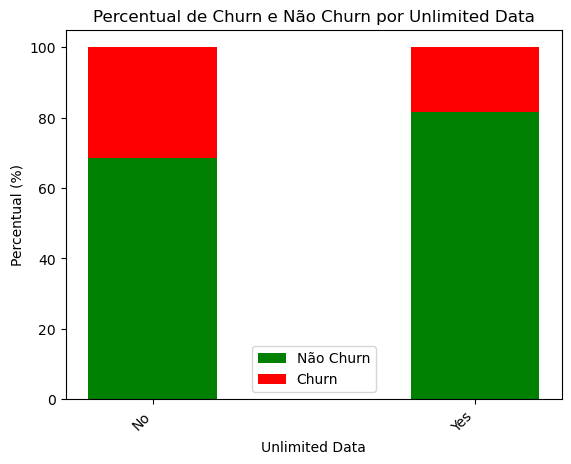

In [28]:
# Calculando a contagem de churn e não churn para Unlimited Data
churn_data = df_3.pivot_table(index='Unlimited Data', columns='Churn Value', aggfunc='size', fill_value=0)

# Calculando percentuais
total = churn_data.sum(axis=1)
percent_churn = churn_data[1] / total * 100
percent_no_churn = churn_data[0] / total * 100

# Preparando os dados para o gráfico
unlimited_labels = churn_data.index
x = range(len(unlimited_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

# Adicionando títulos e rótulos
ax.set_xlabel('Unlimited Data')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Unlimited Data')
ax.set_xticks(x)
ax.set_xticklabels(unlimited_labels, rotation=45, ha='right') 
ax.legend()

plt.show()

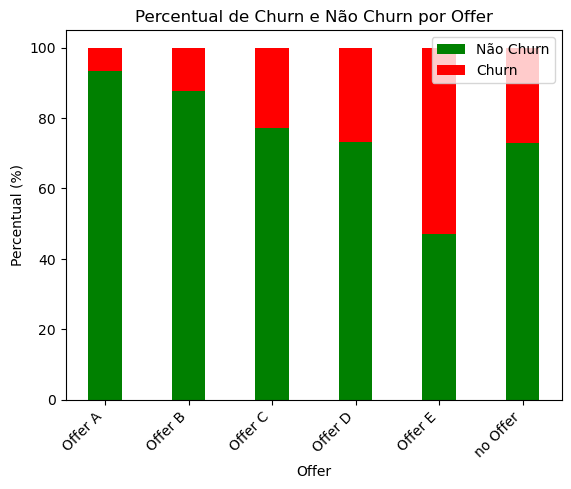

In [29]:
# Calculando a contagem de churn e não churn para Referred a Friend
churn_data = df_3.pivot_table(index='Offer', columns='Churn Value', aggfunc='size', fill_value=0)

# Calculando percentuais
total = churn_data.sum(axis=1)
percent_churn = churn_data[1] / total * 100
percent_no_churn = churn_data[0] / total * 100

# Preparando os dados para o gráfico
offer_labels = churn_data.index
x = range(len(offer_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

# Adicionando títulos e rótulos
ax.set_xlabel('Offer')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Offer')
ax.set_xticks(x)
ax.set_xticklabels(offer_labels, rotation=45, ha='right') 
ax.legend()

plt.show()

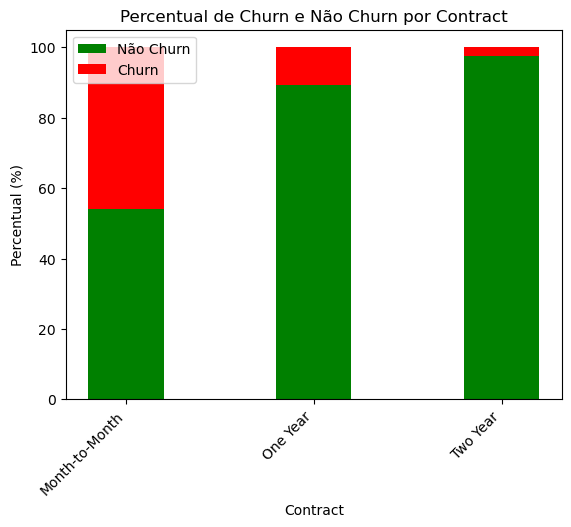

In [30]:
# Calculando a contagem de churn e não churn para Contract
churn_data = df_3.pivot_table(index='Contract', columns='Churn Value', aggfunc='size', fill_value=0)

# Calculando percentuais
total = churn_data.sum(axis=1)
percent_churn = churn_data[1] / total * 100
percent_no_churn = churn_data[0] / total * 100

# Preparando os dados para o gráfico
contract_labels = churn_data.index
x = range(len(contract_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

# Adicionando títulos e rótulos
ax.set_xlabel('Contract')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Contract')
ax.set_xticks(x)
ax.set_xticklabels(contract_labels, rotation=45, ha='right') 
ax.legend()

plt.show()

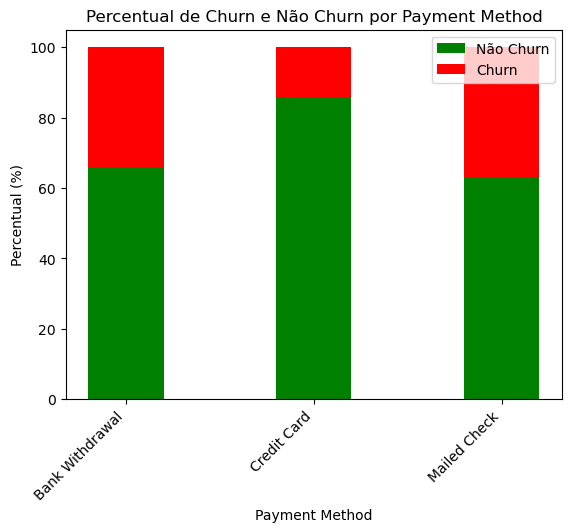

In [31]:
# Calculando a contagem de churn e não churn para Payment Method
churn_data = df_3.pivot_table(index='Payment Method', columns='Churn Value', aggfunc='size', fill_value=0)

# Calculando percentuais
total = churn_data.sum(axis=1)
percent_churn = churn_data[1] / total * 100
percent_no_churn = churn_data[0] / total * 100

# Preparando os dados para o gráfico
pay_method_labels = churn_data.index
x = range(len(pay_method_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

# Adicionando títulos e rótulos
ax.set_xlabel('Payment Method')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Payment Method')
ax.set_xticks(x)
ax.set_xticklabels(pay_method_labels, rotation=45, ha='right') 
ax.legend()

plt.show()

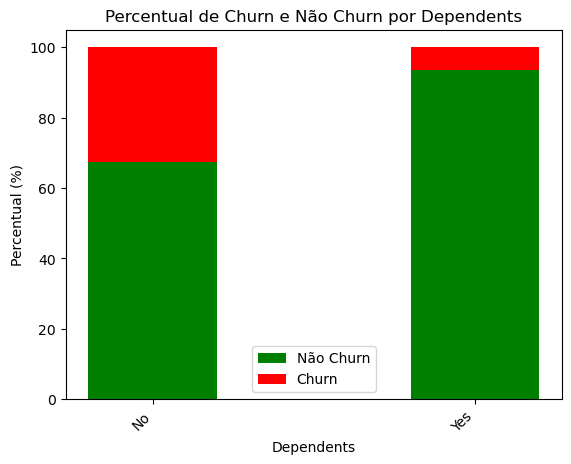

In [32]:
# Calculando a contagem de churn e não churn para Dependents
churn_data = df_3.pivot_table(index='Dependents', columns='Churn Value', aggfunc='size', fill_value=0)

# Calculando percentuais
total = churn_data.sum(axis=1)
percent_churn = churn_data[1] / total * 100
percent_no_churn = churn_data[0] / total * 100

# Preparando os dados para o gráfico
dependents2_labels = churn_data.index
x = range(len(dependents2_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

# Adicionando títulos e rótulos
ax.set_xlabel('Dependents')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Dependents')
ax.set_xticks(x)
ax.set_xticklabels(dependents2_labels, rotation=45, ha='right') 
ax.legend()

plt.show()

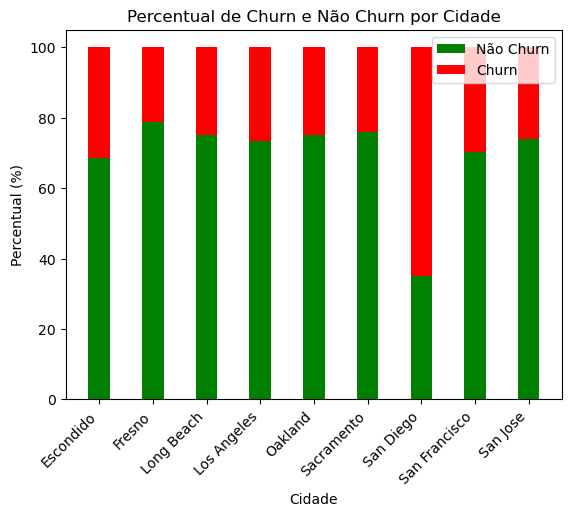

In [33]:
# Agrupando e contando ocorrências
grouped = df_3.groupby('City').size()

# Filtrando cidades com número de registros acima de um limite específico
# Aqui você pode ajustar o limite conforme a necessidade
limite = 50
cidades_principais = grouped[grouped > limite].index

# Filtrando o DataFrame original para incluir apenas as cidades principais
df_filtrado = df_3[df_3['City'].isin(cidades_principais)]

# Repetindo o processo de criação do gráfico com df_filtrado
pivot_data = df_filtrado.pivot_table(index='City', columns='Churn Value', aggfunc='size', fill_value=0)
total = pivot_data.sum(axis=1)
percent_churn = pivot_data[1] / total * 100
percent_no_churn = pivot_data[0] / total * 100

# Preparando os dados para o gráfico
city_labels = pivot_data.index
x = range(len(city_labels))  # localizações das barras no eixo x

# Criando o gráfico
fig, ax = plt.subplots()
ax.bar(x, percent_no_churn, width=0.4, label='Não Churn', color='green')
ax.bar(x, percent_churn, width=0.4, bottom=percent_no_churn, label='Churn', color='red')

ax.set_xlabel('Cidade')
ax.set_ylabel('Percentual (%)')
ax.set_title('Percentual de Churn e Não Churn por Cidade')
ax.set_xticks(x)
ax.set_xticklabels(city_labels, rotation=45, ha='right')
ax.legend()

plt.show()

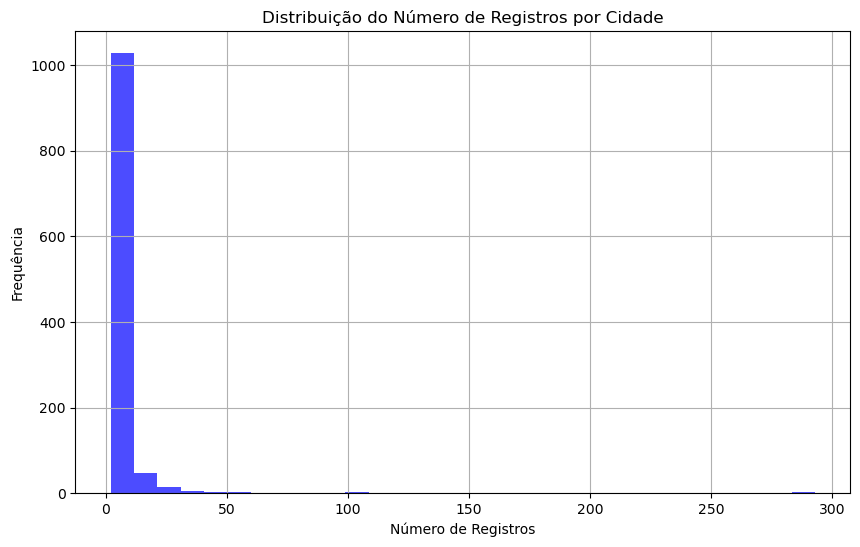

In [34]:

# Contando ocorrências por cidade
grouped = df_3.groupby('City').size()

# Plotando um histograma
plt.figure(figsize=(10, 6))
plt.hist(grouped, bins=30, color='blue', alpha=0.7)
plt.title('Distribuição do Número de Registros por Cidade')
plt.xlabel('Número de Registros')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [35]:
df_3.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported
0,8779-QRDMV,No,0,1,no Offer,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,68701,1,5433,Competitor,Competitor offered more data,5,0
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,55668,1,5302,Competitor,Competitor made better offer,5,0
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,47534,1,3179,Competitor,Competitor made better offer,1,0
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,27778,1,5337,Dissatisfaction,Limited range of services,1,1
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,26265,1,2793,Price,Extra data charges,1,0


In [36]:
df_3.set_index('Customer ID', inplace=True)

In [37]:
df_3.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,No,0,1,no Offer,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,68701,1,5433,Competitor,Competitor offered more data,5,0
7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,55668,1,5302,Competitor,Competitor made better offer,5,0
1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,47534,1,3179,Competitor,Competitor made better offer,1,0
4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,27778,1,5337,Dissatisfaction,Limited range of services,1,1
4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,26265,1,2793,Price,Extra data charges,1,0


In [38]:
df_4 = df_3.copy()
df_4.drop(columns=[
    'Total Regular Charges', 
    'Total Refunds', 
    'Total Extra Data Charges', 
    'Total Long Distance Charges',
    'City',
    'Population',
    'CLTV',
    'Churn Category',
    'Churn Reason'
], inplace=True)


In [39]:
df_4.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value,Total Customer Svc Requests,Product/Service Issues Reported
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,No,0,1,no Offer,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,Male,78,No,Yes,No,No,0,1,5,0
7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,Female,74,No,Yes,Yes,Yes,1,1,5,0
1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,Male,71,No,Yes,No,Yes,3,1,1,0
4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,Female,78,No,Yes,Yes,Yes,1,1,1,1
4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,Female,80,No,Yes,Yes,Yes,1,1,1,0


In [40]:
# Supondo que df_4 já esteja definido e carregado com os dados apropriados.

# Lista de colunas para transformar de 'yes'/'no' para 1/0
colunas = [
    'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
    'Paperless Billing', 'Under 30', 'Senior Citizen', 'Married', 'Dependents'
]

# Substituindo 'yes' por 1 e 'no' por 0 em cada coluna listada
for coluna in colunas:
    df_4[coluna] = df_4[coluna].replace({'Yes': 1, 'No': 0})

# Verificando as mudanças
df_4.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value,Total Customer Svc Requests,Product/Service Issues Reported
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,0,0,1,no Offer,0,0.00,0,1,Fiber Optic,9,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,41.236,Male,78,0,1,0,0,0,1,5,0
7495-OOKFY,1,1,8,Offer E,1,48.85,1,1,Cable,19,0,1,0,0,0,0,0,0,Month-to-Month,1,Credit Card,83.876,Female,74,0,1,1,1,1,1,5,0
1658-BYGOY,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,57,0,0,0,0,1,1,1,1,Month-to-Month,1,Bank Withdrawal,99.268,Male,71,0,1,0,1,3,1,1,0
4598-XLKNJ,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,13,0,1,1,0,1,1,0,0,Month-to-Month,1,Bank Withdrawal,102.440,Female,78,0,1,1,1,1,1,1,1
4846-WHAFZ,1,1,37,Offer C,1,6.33,1,1,Cable,15,0,0,0,0,0,0,0,0,Month-to-Month,1,Bank Withdrawal,79.560,Female,80,0,1,1,1,1,1,1,0


In [41]:
df_4_encoded = pd.get_dummies(df_4, columns=['Offer', 'Internet Type', 'Contract', 'Payment Method', 'Gender'],dtype=int)

# Exibindo as primeiras linhas do DataFrame transformado para verificar
df_4_encoded.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value,Total Customer Svc Requests,Product/Service Issues Reported,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Offer_no Offer,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_no Internet,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Female,Gender_Male
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,0,0,1,0,0.00,0,1,9,0,0,1,0,0,1,0,0,1,41.236,78,0,1,0,0,0,1,5,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7495-OOKFY,1,1,8,1,48.85,1,1,19,0,1,0,0,0,0,0,0,1,83.876,74,0,1,1,1,1,1,5,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1658-BYGOY,0,0,18,1,11.33,1,1,57,0,0,0,0,1,1,1,1,1,99.268,71,0,1,0,1,3,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1
4598-XLKNJ,1,1,25,1,19.76,0,1,13,0,1,1,0,1,1,0,0,1,102.440,78,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4846-WHAFZ,1,1,37,1,6.33,1,1,15,0,0,0,0,0,0,0,0,1,79.560,80,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


### Dividindo entre as partes de treinamento e teste

In [42]:
## Dividindo dataframe nas variaveis independentes e a variavel target.
X = df_4_encoded.drop(['Churn Value'], axis=1)
y = df_4_encoded['Churn Value']
## Dividindo o DataFrame em conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## Fazendo normalizazcao das variaveis.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [43]:
# Definir os parâmetros
parametros = {
    'n_estimators': 500,     # Número de árvores na floresta
    'max_depth': 4,       # Profundidade máxima das árvores
    'min_samples_split': 20,  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': 15,   # Número mínimo de amostras necessárias para estar em um nó folha
    'bootstrap': True,       # Se usar amostras de bootstrap ao construir árvores
    'random_state': 42       # Semente usada pelo gerador de números aleatorios
    }
# Criando o modelo
model = RandomForestClassifier(**parametros)

# Treinar o modelo no conjunto de treinamento
model.fit(X_train_scaled, y_train)

# Calcular as previsões no conjunto de treino
previsoes = model.predict(X_train_scaled)
    
# Calcular a acurácia
acuracia = accuracy_score(y_train, previsoes)

# Calcular a precisão
precisao = precision_score(y_train, previsoes, average='macro')

# Calcular o recall
recall = recall_score(y_train, previsoes, average='macro')

print("Acurácia: ", acuracia)
print("Precisão: ", precisao)
print("Recall: ", recall)

Acurácia:  0.8793042243521477
Precisão:  0.9059157756788896
Recall:  0.7793456933488168


In [44]:
X_test_scaled = scaler.transform(X_test)
# Aplicar o modelo treinado ao conjunto de teste
previsoes_teste = model.predict(X_test_scaled)
# Calcular a acurácia
acuracia = accuracy_score(y_test, previsoes_teste)

# Calcular a precisão
precisao = precision_score(y_test, previsoes_teste, average='macro')

# Calcular o recall
recall = recall_score(y_test, previsoes_teste, average='macro')

print("Acurácia: ", acuracia)
print("Precisão: ", precisao)
print("Recall: ", recall)

Acurácia:  0.8552164655784245
Precisão:  0.8806783051463902
Recall:  0.7593347373637265


In [45]:
df_4.shape

(7043, 32)

In [46]:
df_resultados = pd.DataFrame({
    'Y_test': y_test,
    'Previsoes_teste': previsoes_teste
})
df_resultados.head(10)

,Y_test,Previsoes_teste
Customer ID,,
1732-VHUBQ,1,0
6292-TOSSS,0,0
2546-KZAAT,0,0
4946-EDSEW,1,0
9061-TIHDA,1,1
9576-ANLXO,1,1
9637-CDTKZ,0,0
2608-BHKFN,1,1
1925-LFCZZ,0,0


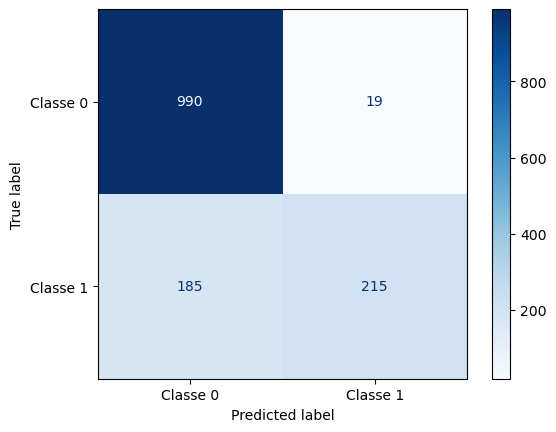

In [47]:
# Criando a matriz de confusão
matriz_conf = confusion_matrix(y_test, previsoes_teste)

# Rótulos para as classes (ajuste conforme necessário)
labels = ['Classe 0', 'Classe 1']

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf, display_labels=labels)
disp.plot(cmap='Blues')  # Ajuste a cor conforme preferência

# Mostrar o gráfico
import matplotlib.pyplot as plt
plt.show()

In [48]:
# Obter probabilidades das previsões (assume-se que a segunda coluna corresponde à classe positiva)
probabilidades_teste = model.predict_proba(X_test_scaled)[:, 1]

# Definir um ponto de corte
ponto_de_corte = 0.35  # Ajuste este valor conforme necessário

# Aplicar o ponto de corte para criar as previsões binárias
previsoes_teste = (probabilidades_teste >= ponto_de_corte).astype(int)

# Calcular a acurácia
acuracia = accuracy_score(y_test, previsoes_teste)

# Calcular a precisão
precisao = precision_score(y_test, previsoes_teste)

# Calcular o recall
recall = recall_score(y_test, previsoes_teste)

print("Acurácia: ", acuracia)
print("Precisão: ", precisao)
print("Recall: ", recall)

Acurácia:  0.8843151171043293
Precisão:  0.7925925925925926
Recall:  0.8025


In [49]:
Acurácia:  0.8552164655784245
Precisão:  0.8806783051463902
Recall:  0.7593347373637265

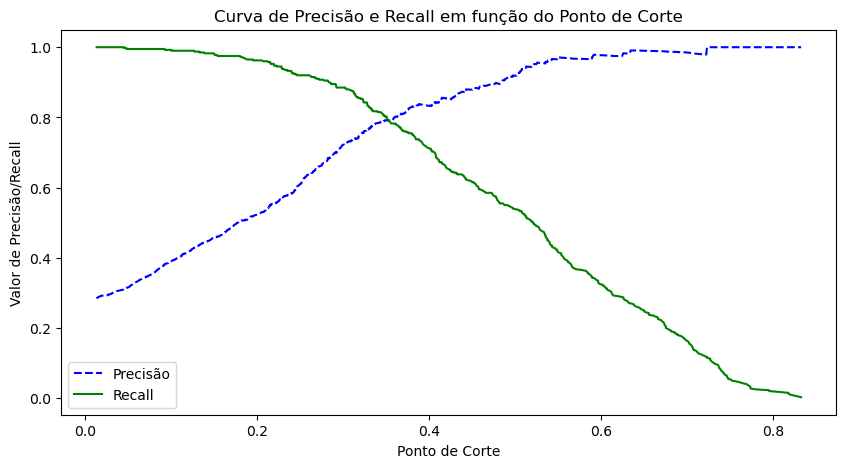

In [50]:
# Suponha que X_test é seu conjunto de teste e que o scaler e o model já estão definidos

# Escalar os dados de teste
X_test_scaled = scaler.transform(X_test)

# Obter probabilidades das previsões
probabilidades_teste = model.predict_proba(X_test_scaled)[:, 1]

# Calcular precisão e recall para vários pontos de corte
precisoes, recalls, thresholds = precision_recall_curve(y_test, probabilidades_teste)

# Criar uma figura para os gráficos
plt.figure(figsize=(10, 5))

# Adicionar a curva de precisão
plt.plot(thresholds, precisoes[:-1], label='Precisão', linestyle='--', color='blue')

# Adicionar a curva de recall
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')

# Adicionar título e rótulos
plt.title('Curva de Precisão e Recall em função do Ponto de Corte')
plt.xlabel('Ponto de Corte')
plt.ylabel('Valor de Precisão/Recall')
plt.legend()

# Mostrar o gráfico
plt.show()

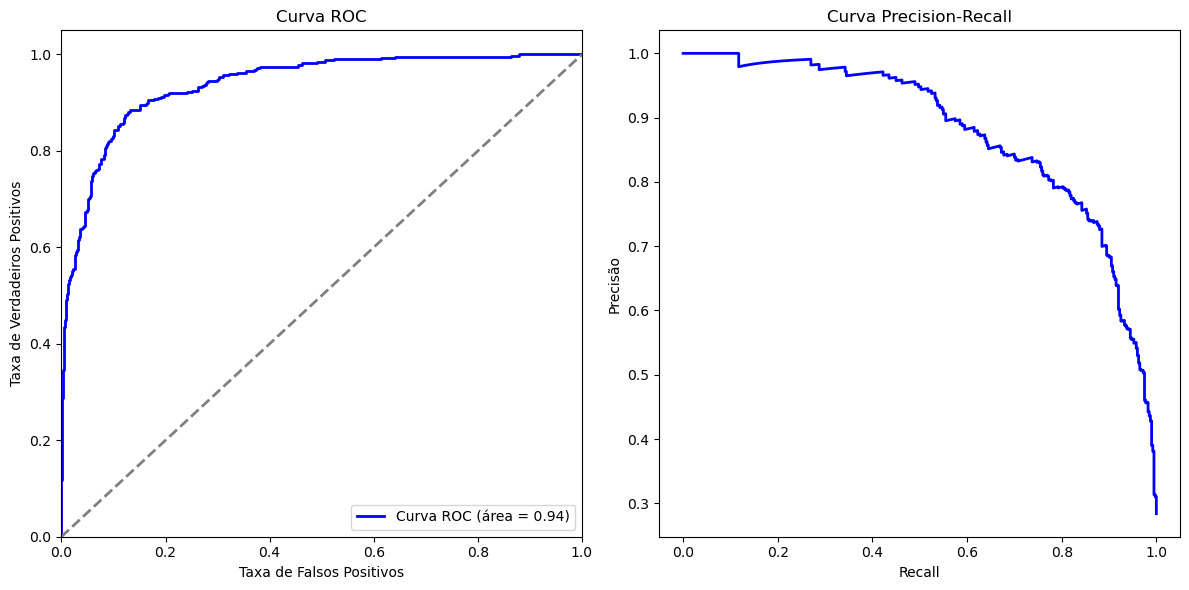

In [51]:
# Calcular a ROC curve e a AUC score
fpr, tpr, roc_thresholds = roc_curve(y_test, probabilidades_teste)
roc_auc = roc_auc_score(y_test, probabilidades_teste)

# Plotar a curva ROC
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Plotar a curva Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recalls, precisoes, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')

plt.tight_layout()
plt.show()


In [52]:
# Suponha que as seguintes variáveis estão definidas:
# y_test = [0, 1, 1, 0, 1]  # Valores reais do teste
# previsoes_teste = [0, 1, 0, 0, 1]  # Previsões do modelo
# probabilidades_teste = [0.2, 0.8, 0.3, 0.4, 0.9]  # Probabilidades estimadas pelo modelo

# Criando o DataFrame
df_resultados = pd.DataFrame({
    'y_test': y_test,
    'previsoes_teste': previsoes_teste,
    'probabilidades_teste': probabilidades_teste
})

# Exibindo o DataFrame criado
df_resultados.head(20)

,y_test,previsoes_teste,probabilidades_teste
Customer ID,,,
1732-VHUBQ,1,1,0.367151
6292-TOSSS,0,0,0.051696
2546-KZAAT,0,0,0.100844
4946-EDSEW,1,0,0.149174
9061-TIHDA,1,1,0.746545
9576-ANLXO,1,1,0.535617
9637-CDTKZ,0,0,0.070730
2608-BHKFN,1,1,0.593962
1925-LFCZZ,0,0,0.160496


In [53]:
df_resultados2 = df_resultados.drop('y_test', axis=1)
df_resultados2.head(20)

,previsoes_teste,probabilidades_teste
Customer ID,,
1732-VHUBQ,1,0.367151
6292-TOSSS,0,0.051696
2546-KZAAT,0,0.100844
4946-EDSEW,0,0.149174
9061-TIHDA,1,0.746545
9576-ANLXO,1,0.535617
9637-CDTKZ,0,0.070730
2608-BHKFN,1,0.593962
1925-LFCZZ,0,0.160496
